## Gather

In [1]:
# import key packages
import pandas as pd
import numpy as np
import requests
import os
import io

In [2]:
# load twitter-archive-enhanced.csv into df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# programmatically download the image predictions dataset
folder_name = 'img_preds'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# load image prediction dataset into df2
img = response.content
df2 = pd.read_csv(io.StringIO(img.decode('utf-8')), sep='\t')

In [5]:
# save the image prediction data as image_predictions.tsv
df2.to_csv('image_predictions.tsv', sep='\t')

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# read the twitter txt file into a list called tweets
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [9]:
# extract tweet_id, favorite_count & retweet_count into a dictionary called df3
df3 = []
i = 0
for i in range(len(tweets)):
    tweet_id = tweets[i]['id']
    favorite_count = tweets[i]['favorite_count']
    retweet_count = tweets[i]['retweet_count']
    df3.append({'tweet_id': int(tweet_id),
               'favorite_count': int(favorite_count),
               'retweet_count': int(retweet_count)})
    i += 1

In [10]:
# convert df3 to a pandas dataframe
df3 = pd.DataFrame(df3, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assess

In [11]:
# load df1 and assess it visually
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# load df2 and assess it visually
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# load df3 and assess it visually
df3

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [14]:
# use .info() method to programmatically assess df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# use .info() method to programmatically assess df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# use .info() method to programmatically assess df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
# use .nunique() to confirm that all tweet_id in df1 are unique
df1.tweet_id.nunique()

2356

In [18]:
# use .nunique() to confirm that all tweet_id in df2 are unique
df2.tweet_id.nunique()

2075

In [19]:
# use .nunique() to confirm that all tweet_id in df3 are unique
df3.tweet_id.nunique()

2354

In [20]:
# compute summary statistics for df1 to further assess it programmatically
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# check for invalid names in df1
df1.query('name == "a" | name == "an" | name == "the" | name == "None" | name == "such" | name == "quite" | name == "this"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None


In [22]:
# compute summary statistics for df2 to further assess it programmatically
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# compute summary statistics for df3 to further assess it programmatically
df3.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [24]:
# check if there are duplicated columns in df1, df2 & df3
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Tidiness
- One variable in four columns in df1 table (dog_stage split into doggo, floofer, pupper, puppo)
- df2 and df3 can be part of df1
- tweet_id columns duplicated in df1, df2, df3

#### Quality
##### `df1` table
- The following columns don't represent original tweets (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp)
- Invalid rating_denominator. Standard rating denominator for WeRate Dogs is 10. Some rating_denominator were either below or above 10 whereas, consistency is pivotal in this dataset. 
- Timestamp & dog_stage columns are not an object
- After joining all three tables, some data are missing in df_1.
- Null represented as (a, an, the, such, this, quite, just, None) in name column
- Null represented as 'None' in doggo, floofer, pupper and puppo columns
- Some dogs had multiple dog_stages (For example dog with the name **Bones** is labelled as a doggo and a pupper). 

##### `df2` table
- Since column p1 represents a 95% confidence in the algorithm, there is no need for column p2 and p3 and other columns associated with p2 and p3
- Also, since we only want original tweets that have images, it is worthy to note that some of the images in jpg_url are not dog images

## Clean

In [25]:
# create a copy of all the dataframes (df1,df2 & df3)
df_1 = df1.copy()
df_2 = df2.copy()
df_3 = df3.copy()

### Unwanted Data (quality)

#### `df1`: The following don't represent original tweets (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  & retweeted_status_timestamp)

##### Define
Locate all the data that are either retweets or reply and drop them.

##### Code

In [26]:
# drop all rows that are either retweets or reply
df_1 = df_1[df_1.in_reply_to_status_id.isnull()]
df_1 = df_1[df_1.retweeted_status_id.isnull()]

##### Test

In [27]:
# use .info() to confirm that all retweets and reply have been dropped
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### `df_1`: The refined df_1 dataframe has columns with 0 values and these columns would as well not be required in this analysis

##### Define
Drop the following columns: in_reply_to_status_id, in_reply_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). In addition, drop any other columns not needed in the analysis.

##### Code

In [28]:
# drop all retweet and reply columns 
df_1.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'expanded_urls'], inplace=True)

##### Test

In [29]:
# use .info() to confirm that all retweets and reply columns have been dropped
# alternatively, the list method can be used 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Tidiness

#### One variable in four columns in `df1` table (dog_stage split into doggo, floofer, pupper & puppo)

##### Define
Melt the doggo, floofer, pupper and puppo columns to a dog_type and dog_stage column. Afterwards, drop the dog_type column. Non essential columns could also be dropped to avoid lengthy code.

##### Code

In [30]:
# use pd.melt to subsume the doggo, pupper, puppo & floofer column into a dog_stage column
df_1 = pd.melt(df_1, id_vars=['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name'], 
               var_name='dog_type', value_name='dog_stage')
df_1 = df_1.drop(['dog_type'], axis=1)
df_1.drop_duplicates(inplace=True)
duplicate = df_1['tweet_id'].duplicated(keep=False)
match =  df_1[duplicate]
match = match[match.dog_stage != 'None']
no_match = df_1[~duplicate]
df_1 = pd.concat([match, no_match], ignore_index=True)

##### Test

In [31]:
# use .head() to confirm if new column (dog_stage) has been created
df_1.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
1,884162670584377345,2017-07-09 21:29:42 +0000,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo
2,872967104147763200,2017-06-09 00:02:31 +0000,Here's a very large dog. He has a date later. ...,12,10,None,doggo
3,871515927908634625,2017-06-04 23:56:03 +0000,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo
4,871102520638267392,2017-06-03 20:33:19 +0000,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo


#### - `df_2` and `df_3` can be part of `df_1`
#### - tweet_id column duplicated in `df_1`, `df_2` and `df_3`

##### Define
Join df_1, df_2 and df_3 dataframes together using pd.merge and drop the duplicated tweet_id columns by joining all three dataframes on tweet_id

##### Code

In [32]:
# use pd.merge to merge df_1, df_2 & df_3 
# merge all 3 columns on tweet_id to expunge duplicated tweet_id columns in df2 & df3
df_1 = pd.merge(df_1, df_2, how='left', on='tweet_id').merge(df_3, how='left', on='tweet_id')

##### Test

In [33]:
# check to confirm if all datafromes were merged and tweet_id is unique
df_1.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711
1,884162670584377345,2017-07-09 21:29:42 +0000,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,20771,3128
2,872967104147763200,2017-06-09 00:02:31 +0000,Here's a very large dog. He has a date later. ...,12,10,None,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,28031,5669
3,871515927908634625,2017-06-04 23:56:03 +0000,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,20730,3628
4,871102520638267392,2017-06-03 20:33:19 +0000,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21461,5764


### Quality

#### Invalid rating_denominator. Standard rating denominator for WeRate Dogs is 10. Some rating_denominator were either below or above 10 whereas, consistency is pivotal in this dataset.

##### Define
Query all rows with a rating_denominator not equal to the standard rating_denominator of 10. Subsequently, provide the corrct rating or drop the rows if need be.

##### Code

In [34]:
# query all rating_denominator not equal to 10
dog_rating = df_1.query('rating_denominator != 10')
dog_rating

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
628,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,84,70,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,13518,3716
679,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5927,1655
928,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,165,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,5316,2539
1042,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",9,11,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,20648,9220
1080,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,204,170,this,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,4196,1434
1114,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4493,1764
1144,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2574,247
1169,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,3062,829
1191,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,80,80,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2529,636
1210,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2634,721


In [35]:
# extract correct ratings from tweet text and drop wrong ratings
dog_rating['rating'] = dog_rating.text.str.extract('(\d{1,3}/10)', expand=True)
dog_rating.dropna(subset=['rating'], inplace=True)
dog_rating['rating_numerator'], dog_rating['rating_denominator'] = dog_rating.rating.str.split('/', 1).str
dog_rating.rating_denominator = dog_rating.rating_denominator.astype(int)
dog_rating.rating_numerator = dog_rating.rating_numerator.astype(int)
dog_rating = dog_rating.drop('rating', axis=1)
dog_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1042,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",14,10,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,20648,9220
1114,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,13,10,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4493,1764
1144,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,11,10,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2574,247
1504,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,10,10,Darrel,None,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,26239,15043
2087,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,9,10,an,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,152,71


In [36]:
# merge correct rating with df_1
df_1 = df_1[df_1['rating_denominator'] == 10]
df_1 = pd.concat([df_1, dog_rating], ignore_index=True)

##### Test

In [37]:
# confirm if there is any rating_denominator not equal to 10
df_1.query('rating_denominator != 10')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


#### Timestamp column is not an object

##### Define
Convert the timestamp column from object to a datetime, which is the standard format for timestamp

Also convert the new column (dog_stage) to a categorical data type

##### Code

In [38]:
# convert the timestamp an dog_stage columns to datetime and category respectively
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])
df_1['dog_stage'] = df_1['dog_stage'].astype('category')

##### Test 

In [39]:
# use .info() to check if timestamp and dog_stage 
# has been assigned to their correct data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 20 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
text                  2096 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
name                  2096 non-null object
dog_stage             2096 non-null category
jpg_url               1969 non-null object
img_num               1969 non-null float64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null object
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null object
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null object
favorite_count        2096 non-null int64
retweet_count         2096 non-null int64
dtypes: category(1), dat

#### After joining all three tables, some data are missing in df2.

##### Define
Drop all columns with missing data

##### Code

In [40]:
# check how many rows have missing data from the 
# resulting merge of df_1, df_2 & df_3
df_1.jpg_url.isnull().values.sum()

127

In [41]:
# drop all columns with missing data
df_1.dropna(inplace=True)

##### Test

In [42]:
# confirm number of rows with missing data
df_1.jpg_url.isnull().values.sum()

0

In [43]:
# additional confirmation check
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2095
Data columns (total 20 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_stage             1969 non-null category
jpg_url               1969 non-null object
img_num               1969 non-null float64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null object
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null object
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: category(1), dat

#### Null represented as (a, an, the, such, this, quite, just, None) in name column

##### Define
replace a, an, the, such, this, quite, just, None with NaN in name column

##### Code

In [44]:
# check number of names with NaN values
df_1.name.isnull().values.sum()

0

In [45]:
# change invalid names to NaN 
df_1['name'] = df_1['name'].replace(['a', 'an', 'the', 'such', 'this', 'quite', 'just', 'None'], np.NaN)

##### Test

In [46]:
# confirm if invalid names have been successfully 
# replaced with NaN
df_1.name.isnull().values.sum()

595

In [47]:
# additonal confirmantion check
list(df_1.name)

['Cassie',
 'Yogi',
 nan,
 'Napolean',
 'Scout',
 nan,
 nan,
 nan,
 'Barney',
 'Mimosa',
 'Meera',
 nan,
 'Rhino',
 'Smiley',
 'Miguel',
 'Emanuel',
 'Pete',
 nan,
 'Astrid',
 'Doobert',
 'Loki',
 'Cupid',
 'Pilot',
 nan,
 'Duchess',
 'Sundance',
 nan,
 nan,
 'Sunny',
 'Bo',
 'Dido',
 'Chubbs',
 nan,
 nan,
 'Rocky',
 nan,
 'Bones',
 nan,
 'Sobe',
 nan,
 nan,
 'Rizzo',
 'Pinot',
 'Deacon',
 'Sampson',
 'Anakin',
 'Finley',
 'Gerald',
 nan,
 'Wishes',
 'Maggie',
 nan,
 nan,
 nan,
 'one',
 nan,
 nan,
 nan,
 nan,
 'Piper',
 'Divine',
 'his',
 'Lenox',
 nan,
 nan,
 nan,
 'Kellogg',
 nan,
 'Kyle',
 nan,
 nan,
 nan,
 nan,
 'Grizzwald',
 nan,
 'Doc',
 nan,
 'Blu',
 nan,
 'Moose',
 'Petrick',
 'Roscoe',
 'Gus',
 nan,
 'Ginger',
 'Jed',
 'Sierra',
 'Rover',
 'Jamesy',
 nan,
 'Boomer',
 'Pickles',
 nan,
 'Clark',
 'Ava',
 'Gidget',
 nan,
 'Kona',
 nan,
 'Gabe',
 'Dido',
 nan,
 'Cooper',
 'Craig',
 nan,
 nan,
 'Ollie',
 nan,
 'Bones',
 nan,
 nan,
 'Laika',
 'Pinot',
 nan,
 nan,
 'Sophie',
 'Huck',

#### Null represented as 'None' in doggo, floofer, pupper and puppo columns

##### Define
Replace None with NaN in dog_stage column

##### Code

In [48]:
# confirm number of dog_stage with NaN values
df_1.dog_stage.isnull().values.sum()

0

In [49]:
# replace None with NaN in dog_stage column
df_1.dog_stage = df_1.dog_stage.replace('None', np.NaN)

##### Test

In [50]:
# confirm if None has been successfully replaced
# with NaN in dog_stage
df_1.dog_stage.isnull().values.sum()

1656

In [51]:
# additional confirmation check
df_1.query('dog_stage == "None"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


#### Some dogs have multiple dog_stages (For example dog with the name **Bones** is labelled as a doggo and a pupper)

##### Define
Drop all rows with wrong/multiple dog_stages

##### Code

In [52]:
# query all rows with multiple dog_stage
wrong_stages = df_1[df_1.tweet_id.duplicated(keep=False)].sort_values(by=['tweet_id']).reset_index(drop=True)
wrong_stages

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 1...",12,10,NaN,doggo,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1.0,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,44619,17621
1,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 1...",12,10,NaN,pupper,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1.0,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,44619,17621
2,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,12,10,NaN,doggo,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,10342,3520
3,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,12,10,NaN,pupper,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,10342,3520
4,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,5,10,NaN,doggo,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,4849,1265
5,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,5,10,NaN,pupper,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,4849,1265
6,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,6620,2173
7,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,pupper,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,6620,2173
8,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,8735,2561
9,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,pupper,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,8735,2561


In [53]:
# use iloc to locate rows with correct dog_stage
correct_stages = wrong_stages.iloc[[8,11,14,17,19]]
correct_stages

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
8,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,8735,2561
11,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,12,10,Bones,pupper,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,8992,2429
14,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",13,10,Dido,pupper,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,11901,3084
17,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",11,10,NaN,floofer,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,17169,3433
19,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,NaN,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,47844,19196


In [54]:
# drop all rows with multiple dog_stage in df_1
# and subsequently concatenate df_1 & correct_stages
i = df_1[df_1.tweet_id.duplicated(keep=False)].index
df_1 = df_1.drop(i)
df_1 = pd.concat([df_1, correct_stages], ignore_index=True)

##### Test

In [55]:
# confirm that no rows have multiple dog_stage
df_1.tweet_id.duplicated().sum()

0

#### Since column p1 represents a 95% confidence in the algorithm, there is no need for column p2 and p3 and other columns associated with p2 and p3

##### Define
Drop columns p2 and p3 and all columns associated with them, since their confidence rating is low

##### Code

In [56]:
# drop columns that would not be valuable for our analysis
df_1 = df_1.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

##### Test

In [57]:
# confirm all required columns have been dropped
list(df_1)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'favorite_count',
 'retweet_count']

#### Also, since we only want original tweets that have images, it is worthy to note that some of the images in jpg_url are not dog images

##### Define
Drop all images in p1_dog that are not dog images

##### Code

In [58]:
# drop all images in p1_dog that are not images of dogs
df_1 = df_1.query('p1_dog == True')

##### Test

In [59]:
# confirm that all images in p1_dog are images of dogs only
df_1.query('p1_dog == False')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count


In [60]:
# save the clean df_1 dataframe as twitter_archive_master.csv
df_1.to_csv('twitter_archive_master.csv')

### Insights & Visualizations

In [61]:
# load twitter_archive_master.csv 
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,32467,7711
1,1,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,True,20771,3128
2,2,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,12,10,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_retriever,0.476913,True,28031,5669
3,3,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,komondor,0.974781,True,20730,3628
4,4,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,Chihuahua,0.955156,True,16476,3327


In [62]:
# query list of columns in df
list(df)

['Unnamed: 0',
 'tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'favorite_count',
 'retweet_count']

In [63]:
# drop 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

##### 1. Number of dog breeds & list of top 20 most rated dogs

In [64]:
# query top 20 most rated dogs
print(df.p1.nunique())
df.groupby(['p1']).tweet_id.count().sort_values(ascending=False).head(20)

111


p1
golden_retriever             131
Labrador_retriever            91
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Name: tweet_id, dtype: int64

##### 2. List of top 10 dogs with the highest favorite_count

In [65]:
# query the top 10 most rated dogs
df.groupby(['p1'])['favorite_count', 'retweet_count'].sum().sort_values(by='favorite_count', ascending=False).head(10)

,favorite_count,retweet_count
p1,,
golden_retriever,1613204,472902
Labrador_retriever,1104820,359558
Pembroke,994755,280367
Chihuahua,673526,219610
Samoyed,542991,184922
French_bulldog,465738,121782
chow,404241,116361
pug,320223,99182
cocker_spaniel,315825,100561


##### 3. List of top 10 dogs with the highest retweet_count

In [66]:
# query list of dogs with the highest favorite_count
df.groupby(['p1'])['retweet_count', 'favorite_count'].sum().sort_values(by='retweet_count', ascending=False).head(10)

,retweet_count,favorite_count
p1,,
golden_retriever,472902,1613204
Labrador_retriever,359558,1104820
Pembroke,280367,994755
Chihuahua,219610,673526
Samoyed,184922,542991
French_bulldog,121782,465738
chow,116361,404241
Pomeranian,106518,299114
cocker_spaniel,100561,315825


##### 4. Dog_stage with the highest retweet_count

In [67]:
# query dog_stage in order of highest retweet_count
df.groupby(['dog_stage']).retweet_count.sum().sort_values(ascending=False)

dog_stage
pupper     373725
doggo      364553
puppo      143674
floofer     38214
Name: retweet_count, dtype: int64

##### 5. Dog_stage with the highest favorite_count

In [68]:
# query dog_stage in order of highest favorite_count
df.groupby(['dog_stage']).favorite_count.sum().sort_values(ascending=False)

dog_stage
pupper     1179867
doggo       986705
puppo       471700
floofer     109611
Name: favorite_count, dtype: int64

##### 6. Dog_stage with the highest ratings

In [69]:
# query all rating numerator
df.groupby(['rating_numerator']).tweet_id.count()

rating_numerator
2       1
3       3
4       4
5       9
6      12
7      24
8      58
9     107
10    318
11    306
12    374
13    209
14     20
26      1
27      1
75      1
Name: tweet_id, dtype: int64

In [70]:
# create bands for the different rating numerators using pd.cut
# store these bands in a column called rating
bin_edge = [1, 5, 9, 13, 75]
bin_name = ['low_rating', 'medium_rating', 'moderately_high_rating', 'high_rating']
df['rating'] = pd.cut(df['rating_numerator'], bin_edge, labels=bin_name)

In [71]:
# display successful execution
df.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,rating
1111,677687604918272002,2015-12-18 03:11:30,This was Cindy's face when she heard Susan for...,11,10,NaN,NaN,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1.0,Pembroke,0.573047,True,2681,950,moderately_high_rating
459,812709060537683968,2016-12-24 17:18:34,This is Brandi and Harley. They are practicing...,12,10,Brandi,NaN,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1.0,Irish_setter,0.326873,True,7373,1665,moderately_high_rating
180,675006312288268288,2015-12-10 17:37:00,Say hello to Mollie. This pic was taken after ...,10,10,Mollie,pupper,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1.0,boxer,0.654697,True,1057,252,moderately_high_rating
1089,679158373988876288,2015-12-22 04:35:49,This is Rubio. He has too much skin. 11/10 htt...,11,10,Rubio,NaN,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1.0,pug,0.272205,True,23568,9193,moderately_high_rating
1048,683357973142474752,2016-01-02 18:43:31,"""Have a seat, son. There are some things we ne...",10,10,NaN,NaN,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1.0,Pembroke,0.406509,True,3238,1059,moderately_high_rating


In [72]:
# query the number of dog_stage for each rating band
dog_stage_ratings = df.groupby(['dog_stage', 'rating']).tweet_id.count()
dog_stage_ratings

dog_stage  rating                
doggo      medium_rating               2
           moderately_high_rating     41
           high_rating                 5
floofer    moderately_high_rating      8
pupper     medium_rating              18
           moderately_high_rating    123
           high_rating                 5
puppo      medium_rating               1
           moderately_high_rating     18
           high_rating                 1
Name: tweet_id, dtype: int64

In [73]:
# display number of dog_stages
dog_stage_total = df.groupby(['dog_stage']).tweet_id.count()
dog_stage_total

dog_stage
doggo       48
floofer      8
pupper     146
puppo       20
Name: tweet_id, dtype: int64

In [74]:
# display proportion of rating for each dog_stage
dog_stage_props = dog_stage_ratings / dog_stage_total
dog_stage_props

dog_stage  rating                
doggo      medium_rating             0.041667
           moderately_high_rating    0.854167
           high_rating               0.104167
floofer    moderately_high_rating    1.000000
pupper     medium_rating             0.123288
           moderately_high_rating    0.842466
           high_rating               0.034247
puppo      medium_rating             0.050000
           moderately_high_rating    0.900000
           high_rating               0.050000
Name: tweet_id, dtype: float64

##### Analysis
From the insights provided, pupper had the highest retweet count and favorite_count but has a lower proportion for rating (0.034247). It can be deduced that a high retweet/favorite count does not necessarily mean a high rating.

##### 7. Visualization showing proportion of dog_stage and their respective ratings

In [75]:
# import necessary packages
import matplotlib.pyplot as plt
%matplotlib inline

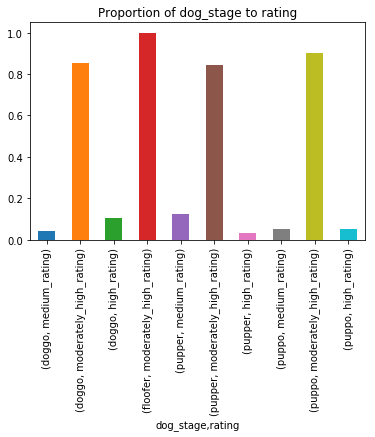

In [76]:
# plot a histogram for the different rating bands of each dog_stage
dog_stage_props.plot(kind='bar', title='Proportion of dog_stage to rating');

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 15 columns):
tweet_id              1448 non-null int64
timestamp             1448 non-null object
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1057 non-null object
dog_stage             222 non-null object
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null bool
favorite_count        1448 non-null int64
retweet_count         1448 non-null int64
rating                1448 non-null category
dtypes: bool(1), category(1), float64(2), int64(5), object(6)
memory usage: 150.2+ KB


### References/Resources
 - stackoverflow.com
 - stackabuse.com
 - geeksforgeeks.org
 - pandas.pydata.org
 - shanelynn.ie